In [35]:
import time
import board
import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
from pylab import *
import pylab
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib
from collections import deque
#matplotlib.use('TkAgg')
#%matplotlib notebook

#import time
import sys
import sqlite3
#from time import sleep

#import adafruit_ads1x15.ads1015 as ADS
import adafruit_ads1x15.ads1115 as ADS
from adafruit_ads1x15.analog_in import AnalogIn

import MySQLdb as db

HOST = "10.208.8.122"
PORT = 3306
USER = "yogi"
PASSWORD = "bittoo"
DB = "TemaccessToRemoteRp2"
'''
try:
    connection = db.Connection(host=HOST, port=PORT,
                               user=USER, passwd=PASSWORD, db=DB)

    c = connection.cursor()
    c.execute("SELECT * from temSensor")
    result = c.fetchall()
    for item in result:
        print (item)

except Exception as e:
    print (e)
'''
connectionL = db.connect(host="10.208.8.121",
                     user="yogi",
                     passwd="bittoo",
                     db="allSensors")

#c = conn.cursor()
connectionR = db.Connection(host=HOST, port=PORT,user=USER, passwd=PASSWORD, db=DB)

cR = connectionR.cursor()
cL =connectionL.cursor()

i2c = busio.I2C(board.SCL, board.SDA)

# Create the ADC object using the I2C bus
ads = ADS.ADS1115(i2c)

ads.gain = 1


cL.execute('DROP TABLE IF EXISTS flowReadings;')
print ('table deleted')


cL.execute('CREATE TABLE flowReadings(id INT AUTO_INCREMENT PRIMARY KEY, ts TIMESTAMP DEFAULT CURRENT_TIMESTAMP, flowHP FLOAT, flowLoad FLOAT);')



lol=[[], [], []]
flowRateLoad  = []

def flatten(l_of_l):
    T = l_of_l[0]
    flattend_l = [val for sublist in T for val in sublist]
    #print ('flattened list is =', flattend_l)
    return flattend_l

def mct(Lol):
    mHP = Lol[2]
    T = flatten(Lol)
    mL = Lol[1]
    #this is density as polynomial function of T
    p_LperH = [999.8473664794213 + 6.29265190e-02*x[2] - 8.42930922e-03*x[2]**2 + 6.77190849e-05*x[2]**3 \
 - 4.40840180e-07*x[2]**4 + 1.29302849e-09*x[2]**5 for x in T  ]

    #pV = [(999.8473664794213 + 6.29265190e-02*x[2] - 8.42930922e-03*x[2]**2 + 6.77190849e-05*x[2]**3 - 4.40840180e-07*x[2]**4 + 1.29302849e-09*x[2]**5)*2.7777e-07*y for x, y in zip(T, mHP)  ]
    # this is mass flow  in kg/S =  density*V(flow rate in m^3/sec)= d * (1000^-3/3600)
    mF_kgPerS =[ x*2.7777e-07*y for x, y in zip(p_LperH, mHP)]
    #this is Cp as functiono of T linear function
    cP_kjPerkgK = [4.253264761904763 - 0.00470305*b[2] for b in T]
    #mCT1 = sum([(4.253264761904763 - 0.00470305*b[2])*a*(b[2]-b[3]) for a, b in zip(mHP, T)])
    #mCT_kW = [(4.253264761904763 - 0.00470305*b[2])*a*(b[3]-b[4]) for a, b in zip(mHP, T)]
    #Cp*M*deltaT
    mCT_kW = [c*a*(b[3]-b[4]) for c, a, b in zip(cP_kjPerkgK,mF_kgPerS, T)]
    # sum(mct* 5/3600 (time stamp))  = kWh
    mCT2_kWh = sum([m*c*(dt[3]-dt[4])*0.0013888889 for m, c, dt in zip(mF_kgPerS,  cP_kjPerkgK, T)])
    #print (T[-1], mHP,'mCpDeltaT =', mCT)
    #print ('mCT is:',mCT)
    #print ('mF', mF_kgPerS, mHP[-1])
    #print (' mCT_kW is:', mCT_kW)
    #print ('mCTkWh is ',mCT2_kWh)
    return mCT_kW, mCT2_kWh

l_id = []

def idGenerator(Id, l_id):
    if Id not in l_id:
       l_id.append(Id) 
    #print (l_id)
    return l_id

#df_conc= None
def dfs(Lol):
    mHP = Lol[2]
    T = flatten(Lol)
    mL = Lol[1]
    StartTemTestingtank = [ 'id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir', 'TtopSourceTank', \
'TloadTankMid','TTopTestTankLoadCir', 'TloadMix', 'TbottomSourceTank', 'TbottomTestTankLoadCir']
    l_T = ['T{}'.format(x) for x in range(0,10)]
    L = StartTemTestingtank +l_T
    df_mHP = DataFrame(mHP, columns=['flowHP'])
    df_mL = DataFrame(mL, columns=['flowLoad'])
    df_tem = DataFrame(T, columns = L)
    df_conc = pd.concat([df_tem, df_mHP, df_mL], axis=1)
    #print (df_mL)
    #print (df_mHP)
    #print (df_tem)
    #print (df_conc)
    return df_conc

def tankStrat(df):
    dfT = df.iloc[:, 11:-2]
    #print (dfT)
    return dfT
#tankStratTem = tankStrat(df_conc)


def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap



table deleted
Loop 1
Loop 1
Loop 1
Loop 1
Loop 1
Loop 1
Loop 1
Loop 1
Loop 1
Loop 1
Loop 1


small x is: 230
small y is : 0    20
1    38
2    33
3    40
4    50
5    59
6    40
7    30
8    58
9    23
Name: 99, dtype: int32
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
5 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 5, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
5 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 5, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow r

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
7 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 7, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
7 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 7, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
8 T0    24.4490
T1    23.5359
T2    22.4880
T3 

10 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 10, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Loop 1
10 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 10, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
10 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 10, dtype: float64
______________________________________

12 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3927
T8    26.4788
T9    25.5991
Name: 12, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
12 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3927
T8    26.4788
T9    25.5991
Name: 12, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
12 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3927
T8    26.4788
T9    25.5991
Name: 12, dtype: float64
_________________________________________

15 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 15, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
15 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 15, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
15 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 15, dtype: float64
__________________________________________

17 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 17, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
17 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 17, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
17 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 17, dtype: float64
____________________________________________

19 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 19, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
19 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 19, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Loop 1
20 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 20, dtype: float64
______________________________________

22 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5652
Name: 22, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
22 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5652
Name: 22, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
22 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5652
Name: 22, dtype: float64
__________________________________________

24 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 24, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
24 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 24, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
25 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.6329
Name: 25, dtype: float64
______________________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
27 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 27, dtype: float64
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
27 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 27, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
27 T0    24.4490
T1    23.5698
T2    22.4880
T3    2

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
29 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.6329
Name: 29, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
29 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.6329
Name: 29, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
29 T0    24.4152
T1    23.5359
T2    22.4542
T3    

31 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 31, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
31 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 31, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
32 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 32, dtype: float64
______________________________________________

34 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.5127
T9    25.6329
Name: 34, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Loop 1
34 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.5127
T9    25.6329
Name: 34, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
34 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.5127
T9    25.6329
Name: 34, dtype: float64
_______________________________________

37 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 37, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
37 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 37, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
37 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 37, dtype: float64
_____________________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
39 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 39, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
39 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 39, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
39 T0    24.4490
T1    23.5359
T2    22.4880
T3  

41 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 41, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
41 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 41, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
41 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 41, dtype: float64
____________________________________________

44 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 44, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
44 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 44, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
44 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 44, dtype: float64
____________________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
46 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5652
Name: 46, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
46 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5652
Name: 46, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
46 T0    24.4490
T1    23.5359
T2    22.4880
T3    21

Loop 1
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
48 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 48, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
48 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 48, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
48 T0    24.4152
T1    23.5698
T2    22.4880


flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
50 T0    24.4152
T1    23.5698
T2    22.5218
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 50, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Loop 1
50 T0    24.4152
T1    23.5698
T2    22.5218
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 50, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
50 T0    24.4152
T1    23.5698
T2    22.

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
53 T0    24.4490
T1    23.5021
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 53, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
53 T0    24.4490
T1    23.5021
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 53, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
53 T0    24.4490
T1    23.5021
T2    22.4880

flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
55 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 55, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Loop 1
55 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 55, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
55 T0    24.4490
T1    23.5698
T2    22.4880
T

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
57 T0    24.4152
T1    23.5698
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3927
T8    26.4788
T9    25.5991
Name: 57, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
57 T0    24.4152
T1    23.5698
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3927
T8    26.4788
T9    25.5991
Name: 57, dtype: float64Loop 1

________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
57 T0    24.4152
T1    23.5698
T2    22.4542
T

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
59 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 59, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
59 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 59, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Loop 1
60 T0    24.4152
T1    23.5698
T2    22.4880
T

flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
62 T0    24.4152
T1    23.5698
T2    22.4542
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.6329
Name: 62, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
62 T0    24.4152
T1    23.5698
T2    22.4542
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.6329
Name: 62, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
62 T0    24.4152
T1    23.5698
T2    22.4542
T3 

flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
64 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 64, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
64 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 64, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
64 T0    24.4152
T1    23.5359
T2    22.4880
T3    2

66 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 66, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
66 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 66, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
66 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 66, dtype: float64
____________________________________________

69 T0    24.4152
T1    23.5359
T2    22.5218
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 69, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
69 T0    24.4152
T1    23.5359
T2    22.5218
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 69, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
69 T0    24.4152
T1    23.5359
T2    22.5218
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 69, dtype: float64
__________________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
71 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 71, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
72 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.9004
T7    27.3927
T8    26.4788
T9    25.5991
Name: 72, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
72 T0    24.4152
T1    23.5359
T2    22.4880
T3    

flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
74 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 74, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
74 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 74, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
74 T0    24.4152
T1    23.5359
T2    22.4880
T3  

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
76 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 76, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
76 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 76, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
76 T0    24.4152
T1    23.5359
T2    22.4880

78 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 78, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
78 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 78, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
79 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 79, dtype: float64
____________________________________________

flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
81 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 81, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
81 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 81, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
81 T0    24.4152
T1    23.5359
T2    22.4880
T3    2

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
83 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7444
T4    21.2038
T5    27.9004
T6    27.8327
T7    27.3588
T8    26.5127
T9    25.5991
Name: 83, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
83 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7444
T4    21.2038
T5    27.9004
T6    27.8327
T7    27.3588
T8    26.5127
T9    25.5991
Name: 83, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
83 T0    24.4490
T1    23.5359
T2    22.4880
T3 

85 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 85, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
85 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 85, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
85 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 85, dtype: float64
__________________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
88 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 88, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
88 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 88, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
88 T0    24.4490
T1    23.5698
T2    22.4880
T3    2

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
91 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 91, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
91 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 91, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
91 T0    24.4152
T1    23.5698
T2    22.

flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
93 T0    24.4490
T1    23.5359
T2    22.5218
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 93, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Loop 1
93 T0    24.4490
T1    23.5359
T2    22.5218
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 93, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
93 T0    24.4490
T1    23.5359
T2    22.5218
T

95 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3927
T8    26.4788
T9    25.5991
Name: 95, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
95 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3927
T8    26.4788
T9    25.5991
Name: 95, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
95 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3927
T8    26.4788
T9    25.5991
Name: 95, dtype: float64
_____________________________________

98 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 98, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
98 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 98, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
98 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 98, dtype: float64
_______________________________________

101 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 101, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
101 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 101, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
101 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 101, dtype: float64
________________________________________

103 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 103, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Loop 1
104 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 104, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
104 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 104, dtype: float64
________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Loop 1
106 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 106, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
106 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 106, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
106 T0    24.4152
T1    23.5359
T2    22.4

108 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 108, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
108 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 108, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
108 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 108, dtype: float64
______________________________

flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
111 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3927
T8    26.4788
T9    25.5652
Name: 111, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
111 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3927
T8    26.4788
T9    25.5652
Name: 111, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
111 T0    24.4490
T1    23.5698
T2    22.4880
T

113 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5652
Name: 113, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
113 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5652
Name: 113, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
113 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5652
Name: 113, dtype: float64
_____________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
115 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 115, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
115 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 115, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
115 T0    24.4152
T1    23.5698
T2    22.4880


flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
118 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 118, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
118 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 118, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
118 T0    24.4490
T1    23.5359
T2    22.4880

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
120 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 120, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
120 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 120, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
120 T0    24.4152
T1    23.5698
T2    22.4880

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
122 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.5127
T9    25.5652
Name: 122, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
122 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.5127
T9    25.5652
Name: 122, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
122 T0    24.4490
T1    23.5698
T2    22.4880
T3

124 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 124, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
125 T0    24.4828
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8327
T7    27.3588
T8    26.4450
T9    25.5991
Name: 125, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
125 T0    24.4828
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8327
T7    27.3588
T8    26.4450
T9    25.5991
Name: 125, dtype: float64
_____________________________________

127 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 127, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
127 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 127, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
127 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 127, dtype: float64
_____________________________________

129 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.6329
Name: 129, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
130 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 130, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
130 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 130, dtype: float64
_________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
132 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 132, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
132 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 132, dtype: float64
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
132 T0    24.4152
T1    23.5359
T2    22.4880
T3

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
134 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 134, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
135 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 135, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
135 T0    24.4152
T1    23.5359
T2    22.4880
T3

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
137 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 137, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Loop 1
137 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 137, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
137 T0    24.4152
T1    23.5359
T2    2

flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
140 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 140, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
140 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 140, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Loop 1
140 T0    24.4490
T1    23.5359
T2    22

142 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 142, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
142 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 142, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
142 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 142, dtype: float64
____________________________________

144 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 144, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
144 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 144, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
145 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5652
Name: 145, dtype: float64
______________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
147 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 147, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
147 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 147, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
147 T0    24.4152
T1    23.5698
T2   

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
149 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 149, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Loop 1
149 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 149, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
149 T0    24.4152
T1    23.5698
T2    2

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
152 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8327
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 152, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Loop 1
152 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8327
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 152, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
152 T0    24.4490
T1    23.5698
T2    22

154 T0    24.4152
T1    23.5359
T2    22.5218
T3    21.8120
T4    21.2376
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 154, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
154 T0    24.4152
T1    23.5359
T2    22.5218
T3    21.8120
T4    21.2376
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 154, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
154 T0    24.4152
T1    23.5359
T2    22.5218
T3    21.8120
T4    21.2376
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 154, dtype: float64
_________________________________

156 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3927
T8    26.4788
T9    25.5652
Name: 156, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
157 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 157, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
157 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 157, dtype: float64
____________________________________

159 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 159, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
159 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 159, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
159 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 159, dtype: float64
______________________________________

161 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 161, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
161 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 161, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
161 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 161, dtype: float64
______________________________________

164 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3250
T8    26.4788
T9    25.5652
Name: 164, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Loop 1
164 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3250
T8    26.4788
T9    25.5652
Name: 164, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
164 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3250
T8    26.4788
T9    25.5652
Name: 164, dtype: float64
_______________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Loop 1
166 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 166, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
166 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 166, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
166 T0    24.4490
T1    23.5698
T2    22

169 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3250
T8    26.4788
T9    25.5991
Name: 169, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
169 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3250
T8    26.4788
T9    25.5991
Name: 169, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
169 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3250
T8    26.4788
T9    25.5991
Name: 169, dtype: float64
_____________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
171 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 171, dtype: float64
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Loop 1
171 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 171, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
171 T0    24.4152
T1    23.5359
T2    22

flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
174 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 174, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
175 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 175, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
175 T0    24.4152
T1    23.5359
T2    22.488

Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
177 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.5127
T9    25.5991
Name: 177, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
177 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.5127
T9    25.5991
Name: 177, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
177 T0    24.4490
T1    23.5359
T2  

flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
180 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 180, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
180 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 180, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
180 T0    24.4152
T1    23.5359
T2    22.4542
T3 

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
182 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.6329
Name: 182, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
182 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.6329
Name: 182, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
183 T0    24.4152
T1    23.5698
T2    22.4

185 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.5127
T9    25.5652
Name: 185, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
185 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.5127
T9    25.5652
Name: 185, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
Loop 1
185 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.5127
T9    25.5652
Name: 185, dtype: float64
_________________________________

188 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 188, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
188 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 188, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
188 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 188, dtype: float64
______________________________________

190 T0    24.4152
T1    23.5359
T2    22.5218
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 190, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
190 T0    24.4152
T1    23.5359
T2    22.5218
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 190, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
190 T0    24.4152
T1    23.5359
T2    22.5218
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 190, dtype: float64
____________________________________

Loop 1
193 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 193, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
193 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 193, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
193 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 193, dtype: float64
________________________

Loop 1
196 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 196, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
196 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 196, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
196 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 196, dtype: float64
__________________________________

198 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 198, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
198 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 198, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
199 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 199, dtype: float64
____________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
201 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 201, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Loop 1
201 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 201, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
201 T0    24.4490
T1    23.5359
T2    2

flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
203 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3927
T8    26.4788
T9    25.5652
Name: 203, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
203 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3927
T8    26.4788
T9    25.5652
Name: 203, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
203 T0    24.4152
T1    23.5698
T2    22.4880
T3 

207 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.9004
T7    27.3250
T8    26.4450
T9    25.5652
Name: 207, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
207 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.9004
T7    27.3250
T8    26.4450
T9    25.5652
Name: 207, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
207 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.9004
T7    27.3250
T8    26.4450
T9    25.5652
Name: 207, dtype: float64
_____________________________

flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
209 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 209, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
209 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 209, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Loop 1
210 T0    24.4490
T1    23.5359
T2    22.4880

flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Loop 1
212 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4450
T9    25.5991
Name: 212, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
212 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4450
T9    25.5991
Name: 212, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
212 T0    24.4152
T1    23.5359
T2    22

flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
214 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8327
T7    27.3927
T8    26.4788
T9    25.5991
Name: 214, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
214 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8327
T7    27.3927
T8    26.4788
T9    25.5991
Name: 214, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
215 T0    24.4490
T1    23.5359
T2    22.4542


flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
217 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 217, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
217 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 217, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
217 T0    24.4152
T1    23.5359
T2    22.4880

219 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.5127
T9    25.5991
Name: 219, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
219 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.5127
T9    25.5991
Name: 219, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Loop 1
219 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.5127
T9    25.5991
Name: 219, dtype: float64
______________________________

Loop 1
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
222 T0    24.4490
T1    23.5698
T2    22.5218
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 222, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
223 T0    24.4152
T1    23.5021
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 223, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
223 T0    24.4152
T1    23.5021
T2    22.

225 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 225, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
225 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 225, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
225 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 225, dtype: float64
____________________________________

228 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8327
T7    27.3588
T8    26.4788
T9    25.5991
Name: 228, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
228 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8327
T7    27.3588
T8    26.4788
T9    25.5991
Name: 228, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
228 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8327
T7    27.3588
T8    26.4788
T9    25.5991
Name: 228, dtype: float64
________________________________

231 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 231, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
231 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 231, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
231 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 231, dtype: float64
______________________________________

233 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 233, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
234 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 234, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
234 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 234, dtype: float64
_______________________________________

236 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 236, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
236 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 236, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
236 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 236, dtype: float64
__________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
238 T0    24.4490
T1    23.5359
T2    22.4542
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 238, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
238 T0    24.4490
T1    23.5359
T2    22.4542
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 238, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
Loop 1
239 T0    24.4152
T1    23.5359
T2    22.

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Loop 1
241 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 241, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
241 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 241, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
241 T0    24.4152
T1    23.5359
T2    22

243 T0    24.4490
T1    23.5359
T2    22.4542
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 243, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
244 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 244, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
244 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 244, dtype: float64
______________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
246 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 246, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
247 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 247, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Loop 1
247 T0    24.4152
T1    23.5698
T2  

249 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 249, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
249 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 249, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
249 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 249, dtype: float64
____________________________________

251 T0    24.4152
T1    23.5021
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 251, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
252 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 252, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
252 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 252, dtype: float64
_______________________________________

254 T0    24.4152
T1    23.5359
T2    22.5218
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4450
T9    25.5991
Name: 254, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
254 T0    24.4152
T1    23.5359
T2    22.5218
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4450
T9    25.5991
Name: 254, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
254 T0    24.4152
T1    23.5359
T2    22.5218
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4450
T9    25.5991
Name: 254, dtype: float64
____________________________________

256 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 256, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
256 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 256, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
256 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 256, dtype: float64
________________________________________

flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
259 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3250
T8    26.4788
T9    25.5652
Name: 259, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
259 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3250
T8    26.4788
T9    25.5652
Name: 259, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
259 T0    24.4152
T1    23.5698
T2    22.488

262 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5652
Name: 262, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Loop 1
262 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5652
Name: 262, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
263 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 263, dtype: float64
_______________________________

Loop 1
265 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7444
T4    21.1700
T5    27.9004
T6    27.9004
T7    27.3927
T8    26.4788
T9    25.5652
Name: 265, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
265 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7444
T4    21.1700
T5    27.9004
T6    27.9004
T7    27.3927
T8    26.4788
T9    25.5652
Name: 265, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
265 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7444
T4    21.1700
T5    27.9004
T6    27.9004
T7    27.3927
T8    26.4788
T9    25.5652
Name: 265, dtype: float64
________________________________

267 T0    24.3813
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 267, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
267 T0    24.3813
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 267, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
267 T0    24.3813
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 267, dtype: float64
______________________________________

flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
269 T0    24.4152
T1    23.5698
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4450
T9    25.5652
Name: 269, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
270 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 270, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
270 T0    24.4152
T1    23.5698
T2    22.4880
T3   

flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
272 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 272, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
272 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 272, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
272 T0    24.4152
T1    23.5359
T2    22.4880
T3 

274 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 274, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
274 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 274, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
274 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 274, dtype: float64
_____________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
277 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 277, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
277 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 277, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Loop 1
277 T0    24.4490
T1    23.5359
T2    

280 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8327
T7    27.3588
T8    26.4788
T9    25.5991
Name: 280, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Loop 1
280 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8327
T7    27.3588
T8    26.4788
T9    25.5991
Name: 280, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
280 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8327
T7    27.3588
T8    26.4788
T9    25.5991
Name: 280, dtype: float64
_______________________________

282 T0    24.4490
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 282, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
282 T0    24.4490
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 282, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
282 T0    24.4490
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 282, dtype: float64
________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
285 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 285, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
285 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 285, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
285 T0    24.4490
T1    23.5698
T2    22.4880


287 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 287, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
287 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 287, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
287 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 287, dtype: float64
__________________________________

290 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 290, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
290 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 290, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
290 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 290, dtype: float64
______________________________

flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
292 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5652
Name: 292, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
292 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5652
Name: 292, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
292 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4788
T9

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
294 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 294, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
295 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 295, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
295 T0    24.4152
T1    23.5359
T2    22.4880
T3   

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
297 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 297, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
297 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 297, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Loop 1297
 T0    24.4152
T1    23.5698
T2    2

flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
300 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4450
T9    25.5991
Name: 300, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
300 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4450
T9    25.5991
Name: 300, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
300 T0    24.4490
T1    23.5698
T2    2

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
303 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.6329
Name: 303, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
303 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.6329
Name: 303, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Loop 1
303 T0    24.4152
T1    23.5359
T2    22.

306 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4450
T9    25.5991
Name: 306, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
306 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4450
T9    25.5991
Name: 306, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
306 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4450
T9    25.5991
Name: 306, dtype: float64
__________________________________________

308 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 308, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
308 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5991
Name: 308, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
309 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 309, dtype: float64
_______________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
312 T0    24.4152
T1    23.5698
T2    22.5218
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 312, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
312 T0    24.4152
T1    23.5698
T2    22.5218
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 312, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
312 T0    24.4152
T1    23.5698
T2   

Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
315 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 315, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
315 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 315, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
315 T0    24.4490
T1    23.5359
T2    

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
318 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 318, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
318 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 318, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
318 T0    24.4490
T1    23.5698
T2    22.4880


320 T0    24.4152
T1    23.5698
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 320, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
320 T0    24.4152
T1    23.5698
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 320, dtype: float64
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
320 T0    24.4152
T1    23.5698
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 320, dtype: float64
_____________________________________

323 T0    24.4490
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 323, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
323 T0    24.4490
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 323, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
323 T0    24.4490
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 323, dtype: float64
_______________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
325 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 325, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
325 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 325, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
326 T0    24.4152
T1    23.5698
T2    

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
328 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 328, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
328 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 328, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
328 T0    24.4152
T1    23.5359
T2    22.4880
T3

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
330 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 330, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
330 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 330, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
331 T0    24.4152
T1    23.5359
T2    22.4542
T3 

333 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 333, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
334 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8327
T7    27.3588
T8    26.4450
T9    25.5652
Name: 334, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
334 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8327
T7    27.3588
T8    26.4450
T9    25.5652
Name: 334, dtype: float64
_____________________________

336 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 336, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
Loop 1
337 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 337, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
337 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 337, dtype: float64
__________________________

339 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 339, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
339 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 339, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
339 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 339, dtype: float64
______________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
341 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5652
Name: 341, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
342 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 342, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Loop 1
342 T0    24.4152
T1    23.5359
T2    22.

flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
344 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 344, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
344 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 344, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
344 T0    24.4152
T1    23.5359
T2    2

348 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 348, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
348 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 348, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
348 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 348, dtype: float64
_______________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
351 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 351, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
351 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 351, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
351 T0    24.4152
T1    23.5698
T2    22

354 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8327
T7    27.3588
T8    26.4788
T9    25.5991
Name: 354, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
354 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8327
T7    27.3588
T8    26.4788
T9    25.5991
Name: 354, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
354 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8327
T7    27.3588
T8    26.4788
T9    25.5991
Name: 354, dtype: float64
_________________________________________

357 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 357, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
357 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 357, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
Loop 1
357 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 357, dtype: float64
_______________________________

flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
360 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4450
T9    25.5991
Name: 360, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
360 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4450
T9    25.5991
Name: 360, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
360 T0    24.4490
T1    23.5359
T2    2

362 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 362, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
362 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 362, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
363 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3250
T8    26.4788
T9    25.5991
Name: 363, dtype: float64
____________________________________

365 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4450
T9    25.5991
Name: 365, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
365 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4450
T9    25.5991
Name: 365, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Loop 1
365 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3927
T8    26.4450
T9    25.5991
Name: 365, dtype: float64
_________________________________

Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
367 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 367, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
367 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 367, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
368 T0    24.4152
T1    23.5359
T2    22.48

flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
370 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 370, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
370 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 370, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
370 T0    24.4152
T1    23.5359
T2    22.4542
T3

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
372 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 372, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
373 T0    24.4152
T1    23.5698
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 373, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
373 T0    24.4152
T1    23.5698
T2    2

375 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.5127
T9    25.5991
Name: 375, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
375 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.5127
T9    25.5991
Name: 375, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
375 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.5127
T9    25.5991
Name: 375, dtype: float64
______________________________________

377 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 377, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
377 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 377, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
377 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 377, dtype: float64
______________________________________

380 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 380, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
380 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 380, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
380 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3927
T8    26.4788
T9    25.5991
Name: 380, dtype: float64
______________________________________

383 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 383, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
383 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 383, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Loop 1
383 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 383, dtype: float64
____________________________

Loop 1
386 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 386, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
387 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 387, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
387 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 387, dtype: float64
__________________________________

flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
389 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 389, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
389 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 389, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
389 T0    24.4152
T1    23.5359
T2    22.4880
T3 

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
392 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 392, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Loop 1
393 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 393, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
393 T0    24.4152
T1    23.5359
T2    22.488

flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Loop 1
Loop 1
396 T0    24.4490
T1    23.5698
T2    22.4542
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 396, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
396 T0    24.4490
T1    23.5698
T2    22.4542
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 396, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
396 T0    24.4490
T1    23.56

399 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 399, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
399 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 399, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
399 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 399, dtype: float64
________________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
401 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 401, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
401 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 401, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Loop 1
402 T0    24.4152
T1    23.5359

Loop 1404
 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 404, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
404 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 404, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
404 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 404, dtype: float64
_______________________________

407 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5652
Name: 407, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
407 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5652
Name: 407, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
407 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5652
Name: 407, dtype: float64
__________________________________

flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
410 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 410, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
410 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 410, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
410 T0    24.4152
T1    23.5698
T2    22.4880
T

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
413 T0    24.4152
T1    23.5698
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 413, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
413 T0    24.4152
T1    23.5698
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 413, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
413 T0    24.4152
T1    23.5698
T2    22.4542

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
416 T0    24.4152
T1    23.5698
T2    22.4542
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3250
T8    26.4450
T9    25.5991
Name: 416, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
416 T0    24.4152
T1    23.5698
T2    22.4542
T3    21.8120
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3250
T8    26.4450
T9    25.5991
Name: 416, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
416 T0    24.4152
T1    23.5698
T2    22.4542
T

419 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 419, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
419 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 419, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
419 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 419, dtype: float64
_________________________________

422 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 422, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Loop 1
422 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 422, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
422 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 422, dtype: float64
_______________________________

Loop 1
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
425 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7444
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 425, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Loop 1
425 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7444
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 425, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
426 T0    24.4152
T1    23.5359
T2 

428 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3250
T8    26.4450
T9    25.5652
Name: 428, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
428 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3250
T8    26.4450
T9    25.5652
Name: 428, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
428 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3250
T8    26.4450
T9    25.5652
Name: 428, dtype: float64
_______________________________

431 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.6329
Name: 431, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
431 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.6329
Name: 431, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
431 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.6329
Name: 431, dtype: float64
___________________________________

flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
433 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 433, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
434 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 434, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
434 T0    24.4152
T1    23.5359
T2    22

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Loop 1
436 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 436, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Loop 1
437 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3250
T8    26.4450
T9    25.5991
Name: 437, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
437 T0    24.4152
T1    23.5698
T2    

Loop 1
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
439 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 439, dtype: float64
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
439 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 439, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
439 T0    24.4152
T1    23.5359
T2    

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
442 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.5127
T9    25.5991
Name: 442, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
442 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.5127
T9    25.5991
Name: 442, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
442 T0    24.4152
T1    23.5698
T2    22.4880


flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Loop 1
444 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.9004
T6    27.8666
T7    27.3250
T8    26.4450
T9    25.5991
Name: 444, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
445 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5652
Name: 445, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
445 T0    24.4490
T1    23.5359
T2    22.4

flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
447 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 447, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
447 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 447, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
447 T0    24.4152
T1    23.5359
T2    22.4880
T

flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
450 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 450, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
451 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 451, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
451 T0    24.4152
T1    23.5698
T2    22.4880

453 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 453, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
453 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 453, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
453 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.8120
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 453, dtype: float64
______________________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
455 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5652
Name: 455, dtype: float64
________________________________________________________________
Loop 1
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
456 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3250
T8    26.4788
T9    25.5991
Name: 456, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
456 T0    24.4152
T1    23.5698
T2    

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
458 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7444
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3250
T8    26.4788
T9    25.5652
Name: 458, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
458 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7444
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3250
T8    26.4788
T9    25.5652
Name: 458, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
458 T0    24.4152
T1    23.5359
T2    22.4880
T

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
461 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8327
T7    27.3588
T8    26.4788
T9    25.5652
Name: 461, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Loop 1
461 T0    24.4490
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.8327
T7    27.3588
T8    26.4788
T9    25.5652
Name: 461, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
461 T0    24.4490
T1    23.5359
T2    

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
464 T0    24.4152
T1    23.5359
T2    22.5218
T3    21.7782
T4    21.1700
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4450
T9    25.5991
Name: 464, dtype: float64
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
465 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3588
T8    26.4788
T9    25.5991
Name: 465, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
465 T0    24.4152
T1    23.5698
T2    22.4880

468 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3250
T8    26.4788
T9    25.5652
Name: 468, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Loop 1
468 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3250
T8    26.4788
T9    25.5652
Name: 468, dtype: float64
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
468 T0    24.4152
T1    23.5359
T2    22.4542
T3    21.7782
T4    21.2038
T5    27.8666
T6    27.8666
T7    27.3250
T8    26.4788
T9    25.5652
Name: 468, dtype: float64
______________________________

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
470 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5652
Name: 470, dtype: float64
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
470 T0    24.4152
T1    23.5359
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9004
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.5652
Name: 470, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
470 T0    24.4152
T1    23.5359
T2    22.4880
T3 

KeyboardInterrupt: 

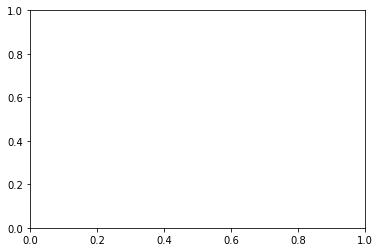

In [37]:
#This works plots interactivly but index dosent changes. So i need to yield the x and y values from generators
#wghen yielding, x and y, its yielding redundant values of x and y, because the wjole list is again a nd agin
#getting yielde in while loop. I need to yield not from list but directly from Mysql perhaps
def plotObject(df,alpha =0.7):

    #plt.ion()
    #fig, ax = plt.ion()
    #ax.set_xlabel('Index')
    #ax.set_ylabel('Tem, C', color='r')
    #plt.legend (bbox_to_anchor=(1.4,0.89), fontsize='xx-small', loc='upper right', ncol=2)
    for i in range (0, 10):
        x = df.index[-1]
        y =df.iloc[-1]
        #print ('dataframe is :',df)
        Fig = ax.plot(x, y.iloc[i], label = 'Layer ' + str(10-i), color= scm.to_rgba(10-i, alpha))
    #plt.show()
    #plt.draw()
    #plt.pause(0.05)
    return Fig

#tankStrat(dfs(lol))
cmap_name = "jet"
scm = create_color_step_obj(cmap_name, 10)
#plt.ion()
#fig, ax = plt.subplots()
#plt.legend (bbox_to_anchor=(1.4,0.89), fontsize='xx-small', loc='upper right', ncol=2)
#plt.draw()
#plt.pause(0.05)
#x = np.random.random()
x = 230
#x = pd.DataFrame(np.zeros(1))
print ('small x is:',x)
y = pd.DataFrame(np.random.randint(20,60,size=(100, 10))).iloc[-1]
#y = pd.DataFrame(np.Nan(0,100,size=(100, 10))).iloc[-1]
#y = pd.DataFrame([0]*10)
print ('small y is :', y)
#fig = [plt.plot(x, y.iloc[i], label = 'Layer ' + str(10-i), color= scm.to_rgba(10-i, 0.7)) for i in range (0,10)]
#plt.figure(figsize=(10,8))
plt.ion()
#plt.figure()
#plt.ion()
fig = plt.figure()
axes = fig.add_subplot(111)
#plt.axis([0,1000,0,1])
x = x

'''
for i in range(0, 10):
    Y = y.iloc[i]
    
    #Y = y.iloc[i]
    line_list = [plt.scatter(x, Y, label = 'Layer ' + str(10-i), color= scm.to_rgba(10-i, 0.7)) for i in range (0, 10)]
    #plt.ion()
    plt.draw()
    #time.sleep(0.1)
    plt.pause(0.0001)  
    plt.show()
    ##plt.pause(0.01)
'''
def plotInnerFig(figs, df):
    for fi in figs:
        fi.set_ydata(df)
        plt.draw()
        plt.pause(0.5)
        plt.show()
    return 

def plot(df, fig):
    x = df.index
    y = df
    Fig = [fi.set_ydata(df) for fi in fig]
        
    plt.draw()
    plt.pause(0.5)
    plt.show()
    return Fig

import threading
import time
def whileLoopMain():
    while True:
        #c.execute("INSERT INTO flowReadings(flowHp, flowLoad) VALUES(?,?,?,?)", (chan2.voltage, chan1.voltage))
        #connection.commit()
        chan1 = AnalogIn(ads, ADS.P0)
        chan2 = AnalogIn(ads, ADS.P1)

        chan1Vol = chan1.voltage
        chan1curr = chan1Vol/159.42

        chan2Vol = chan2.voltage
        chan2curr=chan2Vol/159.65
        #flow1 = ((chan1Vol/159.42)*1000 -4)/16*1000
        flow1 = ((chan1Vol/159.42)-0.003956)/0.0000159
        #flow2 = ((chan2Vol/159.65)*1000 -4)/16*4000 +20
        #flow2 = ((chan2Vol/159.65)- 0.0005468893873066417)/1.09561608e-05
        flow2 = ((chan2Vol/159.65)- 0.003973767754877122)/5.3038815e-06
        cL.execute("INSERT INTO flowReadings(flowHp, flowLoad) VALUES(%s, %s)", (flow2, flow1))
        connectionL.commit()
        #print('flow HP:',"{:>5}\t{:>5.3f}".format(chan2.value, chan2.voltage), '\n\n')
        #print('flow load:',"{:>5}\t{:>5.3f}".format(chan1.value, chan1.voltage, '\n\n'))
        print('flow rates load is = ',chan1Vol, chan1curr,flow1 )
        print('flow rates HP is = ',chan2Vol, chan2curr,flow2 )

        connectionR = db.Connection(host=HOST, port=PORT,user=USER, passwd=PASSWORD, db=DB)
        cR = connectionR.cursor()
        #c.execute("SELECT * from temSensor")
        cR.execute("SELECT * FROM temSensor ORDER BY id DESC LIMIT 1")
        result = cR.fetchall()
        id = result[0][0]
        idGenerator(id, l_id)
        #print ('id is :', id)
        flowRateLoad.append(flow1)

        if lol[0] ==[] or id < lol[0][-1][0][0] :
            lol[0].append(result)
            #print (lol)
            lol[1].append(flow1)
            lol[2].append(flow2)
        elif lol[0] != [] and id > lol[0][-1][0][0]:

            lol[0].append(result)
            lol[1].append(flow1)
            lol[2].append(flow2)


        mct(lol)
        #print ('lol is:',lol)
        #dfs(lol)
        tankStrat(dfs(lol))
        #plot(tankStrat(dfs(lol)), plotObject(tankStrat(dfs(lol))))
        #plotObject(tankStrat(dfs(lol)))for i in range (0, 10):
        x = tankStrat(dfs(lol)).index[-1]
        y =tankStrat(dfs(lol)).iloc[-1]
        print (x, y)
        #yield x, y 
        '''
        for line in line_list:
            print (type(line), line)
            for li in line:
                li.set_xdata(x)
                li.set_ydata(y)
        axes.autoscale_view(True,True,True)
        '''
        '''
        for line in line_list:
            line.set_xdata(x)
            line.set_ydata(y)
        plt.show()
        plt.draw()
        plt.pause(0.0001)
        '''
        
        
        #plt.figure()
        #for f in fig:
        #    f.set_xdata(x)
        #    f.set_ydata(y)
        #plt.show()
        #plt.draw()
        #plt.pause(0.01)
        #print('x is ',x, 'y is:', y)
        #plt.draw()
        #plt.pause(0.05)
        #print ('dataframe is :',df)
    
    
    
        print('________________________________________________________________')
        time.sleep(0.10)
 

whileLoopMain()

'''
def infiniteloop1(h):
    while True:
        v = np.random.randint(2)
        h = h^2
        #h = -4.9*t**2 + 1
        #v = g*t
        #print (v)
        yield v, h

thread2 = threading.Thread(target= infiniteloop1(1))
thread2.start()
for v, h in infiniteloop1(1):
    print (h, v)
#X_value = infiniteloop1(1)
#data = next (X_value)
                           
thread2 = threading.Thread(target= whileLoopMain)
thread2.start()
for x, y in whileLoopMain():
    print (x, y)

'''
'''
data_out  = whileLoopMain()
#data = [next(data_out)]
while data_out:
    data = [next(data_out)]
    print (data)
    time.sleep(0.10)
#for X, Y in whileLoopMain():
#    print ('X is:',X, 'Y is :',Y)
'''